In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

df = pd.read_excel(r'/content/glass.xlsx')
# to read just one sheet to dataframe:
df1 = pd.read_excel('/content/glass.xlsx', sheet_name="glass")
df1.head()
df2= pd.read_excel('/content/glass.xlsx', sheet_name="Description")
df2.head()

# Display basic info and first few rows
print(df1.info())
print(df1.head())
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
RI   

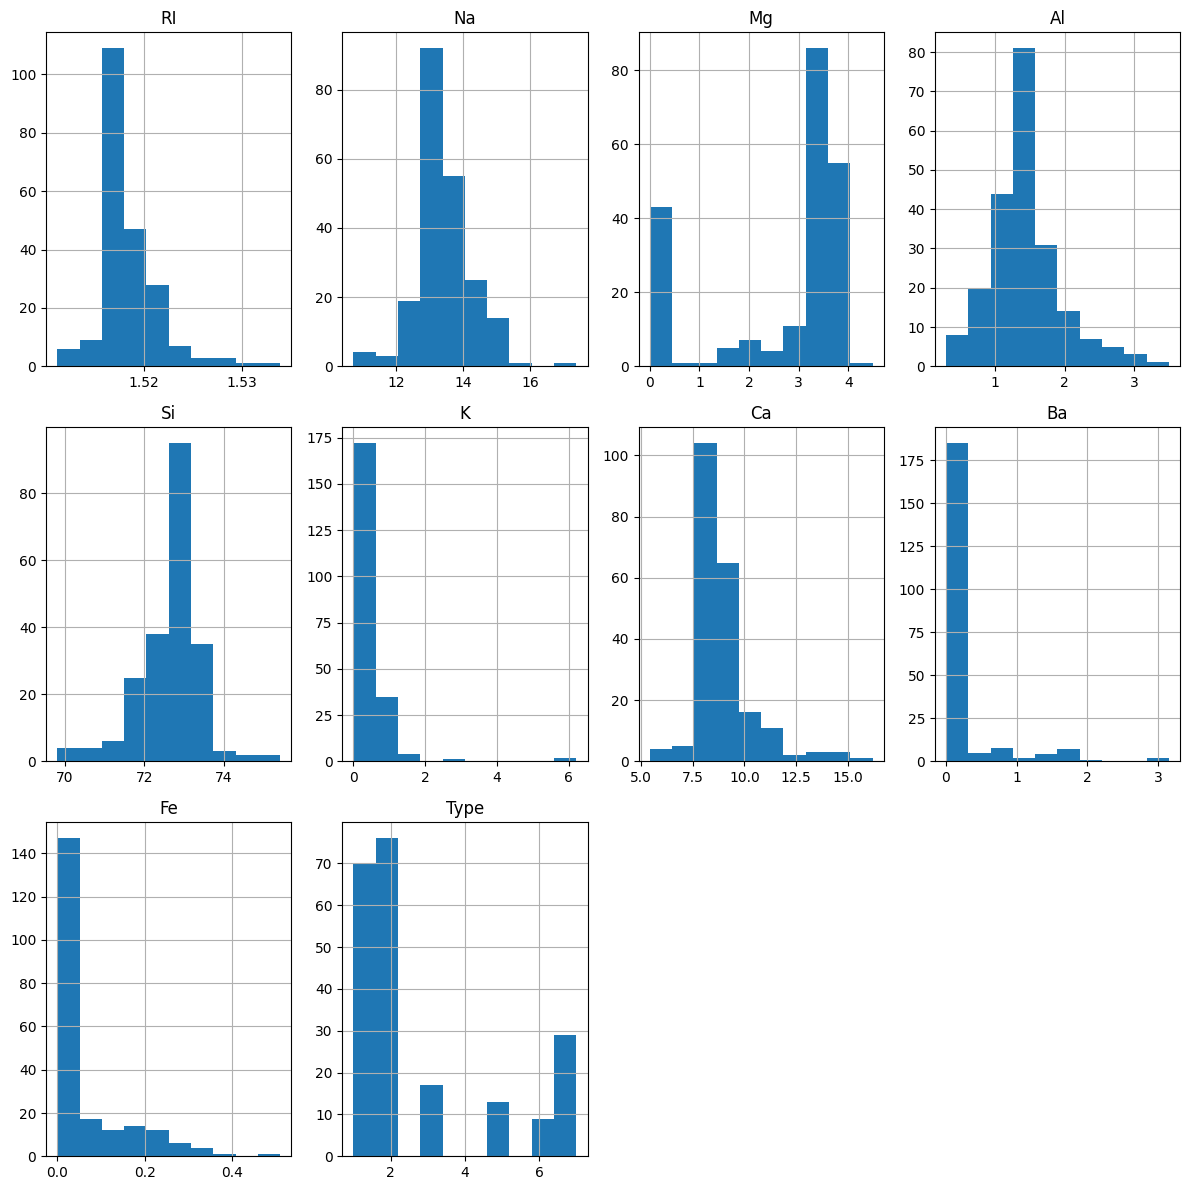

In [19]:
# Select numerical columns from heart disease DataFrame
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot layout as per your number of numerical columns
    df1[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

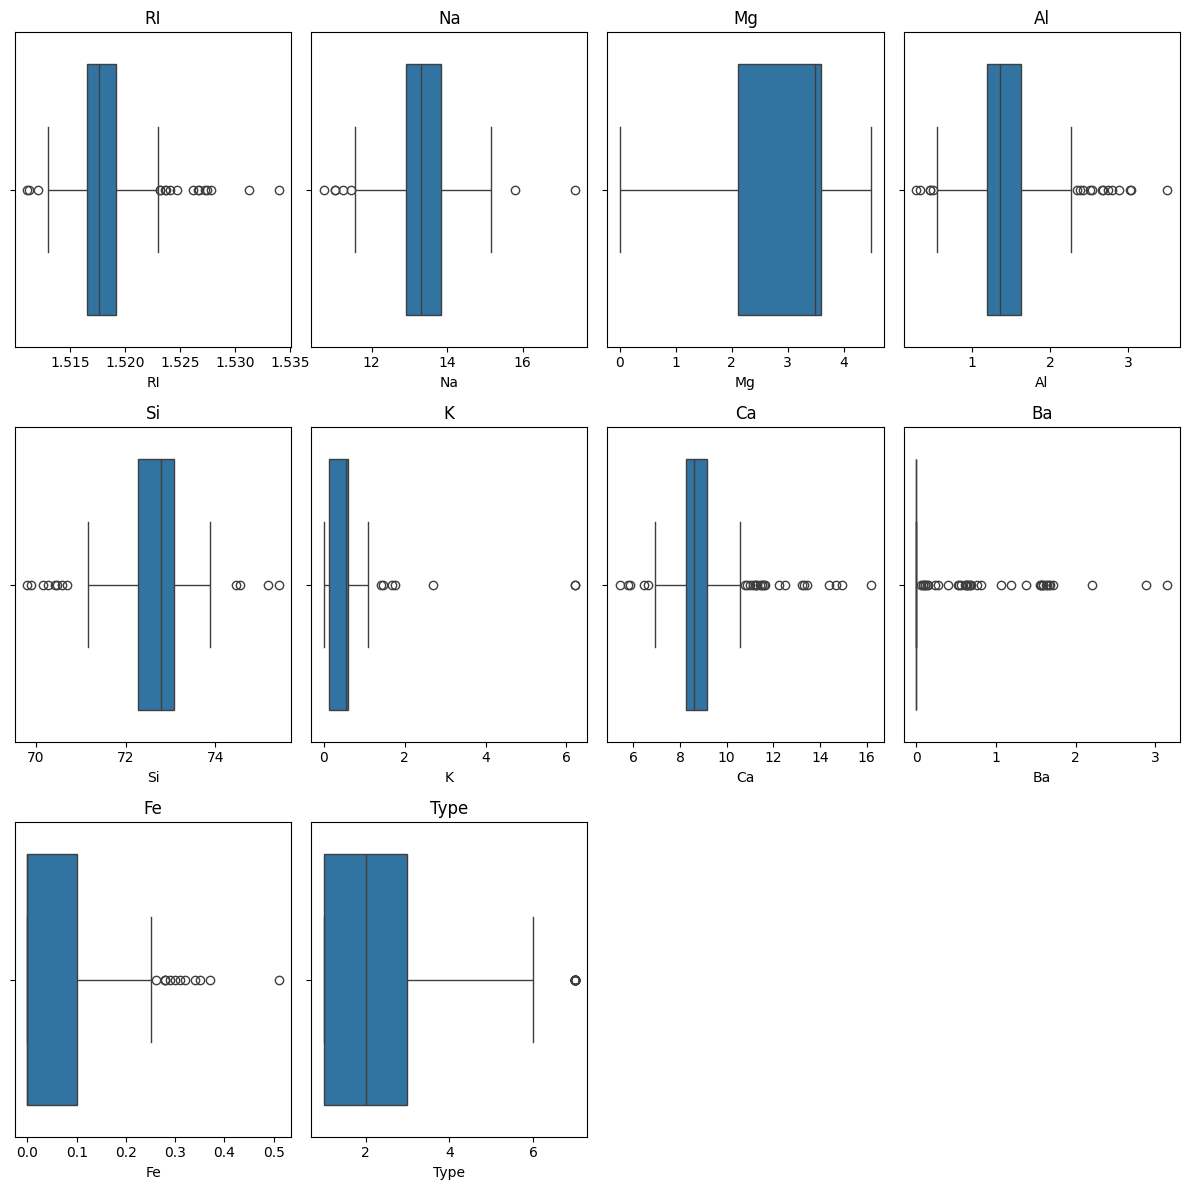

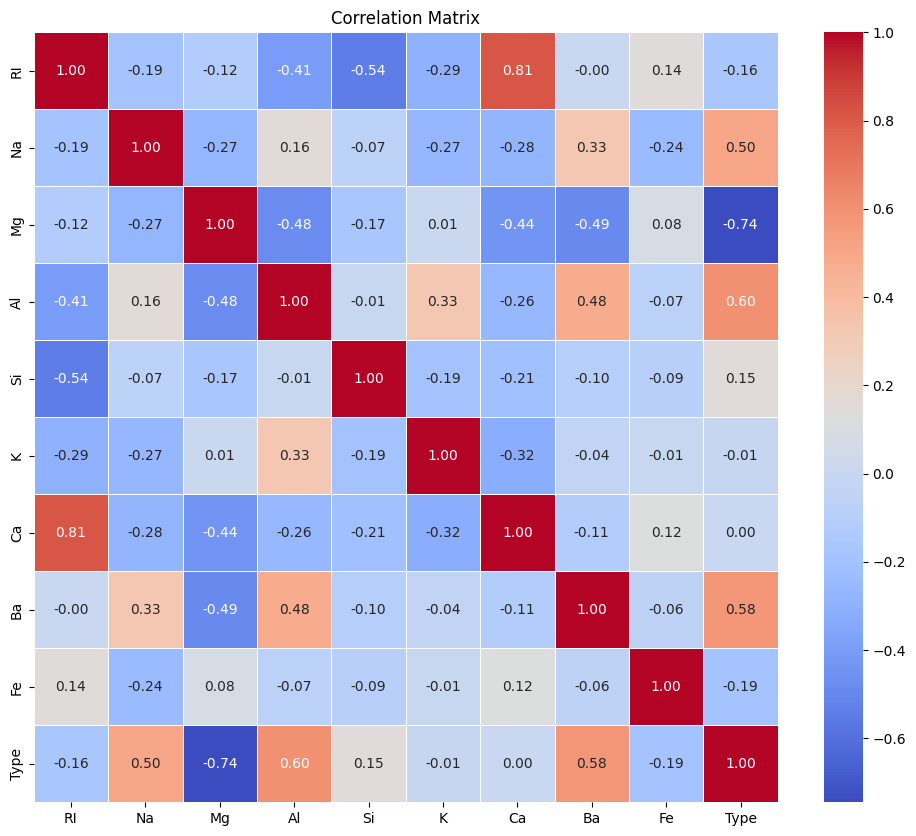

In [20]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot layout as per your number of numerical columns
    sns.boxplot(x=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Compute correlation matrix
corr_matrix = df1[numerical_columns].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Example checking for inconsistencies value counts for categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(df1[col].value_counts())

In [22]:
from sklearn.model_selection import train_test_split

X = df1.drop('Type', axis=1)
y = df1['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Implementing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Additional: Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))



Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [29]:
# Bagging with Random Forest
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier with Random Forest base estimator
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

# Print metrics
print("Bagging with Random Forest:")
print(f"Accuracy: {accuracy_bagging}")
print(f"Precision: {precision_bagging}")
print(f"Recall: {recall_bagging}")
print(f"F1-score: {f1_bagging}")
print()
print(classification_report(y_test, y_pred_bagging))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8604651162790697
Bagging with Random Forest:
Accuracy: 0.8604651162790697
Precision: 0.8816935002981515
Recall: 0.8604651162790697
F1-score: 0.855389915855032

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.85      0.79      0.81        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.93      0.83      0.85        43
weighted avg       0.88      0.86      0.86        43



In [30]:
# Boosting with Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

# Print metrics
print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print()
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8604651162790697
Gradient Boosting:
Accuracy: 0.8604651162790697
Precision: 0.8799372462163159
Recall: 0.8604651162790697
F1-score: 0.8501294328106912

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



In [31]:
# Compare results
print("Comparison of Classification Metrics:")
print("-------------------------------------")
print("Random Forest:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print()

print("Bagging with Random Forest:")
print(f"Accuracy: {accuracy_bagging}")
print(f"Precision: {precision_bagging}")
print(f"Recall: {recall_bagging}")
print(f"F1-score: {f1_bagging}")
print()

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print()

Comparison of Classification Metrics:
-------------------------------------
Random Forest:
Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481

Bagging with Random Forest:
Accuracy: 0.8604651162790697
Precision: 0.8816935002981515
Recall: 0.8604651162790697
F1-score: 0.855389915855032

Gradient Boosting:
Accuracy: 0.8604651162790697
Precision: 0.8799372462163159
Recall: 0.8604651162790697
F1-score: 0.8501294328106912



Compared the metrics for Random Forest, Bagging with Random Forest, and Gradient Boosting to determine which method performs better for your specific dataset and classification task.